# <center>Regression and Time Series (MA60056) - Spring 2020</center>

## <center> ASSIGNMENT 1</center>

**Suman Pal 
Roll no. 19BM6JP22
(PGDBA)**

**Collect the data as discussed in the class.
 Y= Height, 
 X= length of palm of hand as shown in 2**

In [1]:
data = read.csv("D:/Suman/PGDBA/IIT Kgp/RTSM/RTSM_data.csv")

In [2]:
myx = data$Palm.Length..cms.[data$Roll.Number == "19BM6JP22" ]
myy = data$Height..cms.[data$Roll.Number == "19BM6JP22" ]
mydata = as.data.frame(cbind(myx,myy))
colnames(mydata) = c("X","Y")
Y = data$Height..cms.[!data$Roll.Number == "19BM6JP22" ]
X = data$Palm.Length..cms.[!data$Roll.Number == "19BM6JP22" ]

**(1) Fit a simple liner regression model  for Y on X [don’t on your own observation]**



Call:
lm(formula = Y ~ X)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1257  -4.5391  -0.7559   4.3743  16.5576 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 141.9073     7.8562  18.063  < 2e-16 ***
X             1.4852     0.3806   3.902 0.000266 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.119 on 54 degrees of freedom
Multiple R-squared:   0.22,	Adjusted R-squared:  0.2055 
F-statistic: 15.23 on 1 and 54 DF,  p-value: 0.0002662


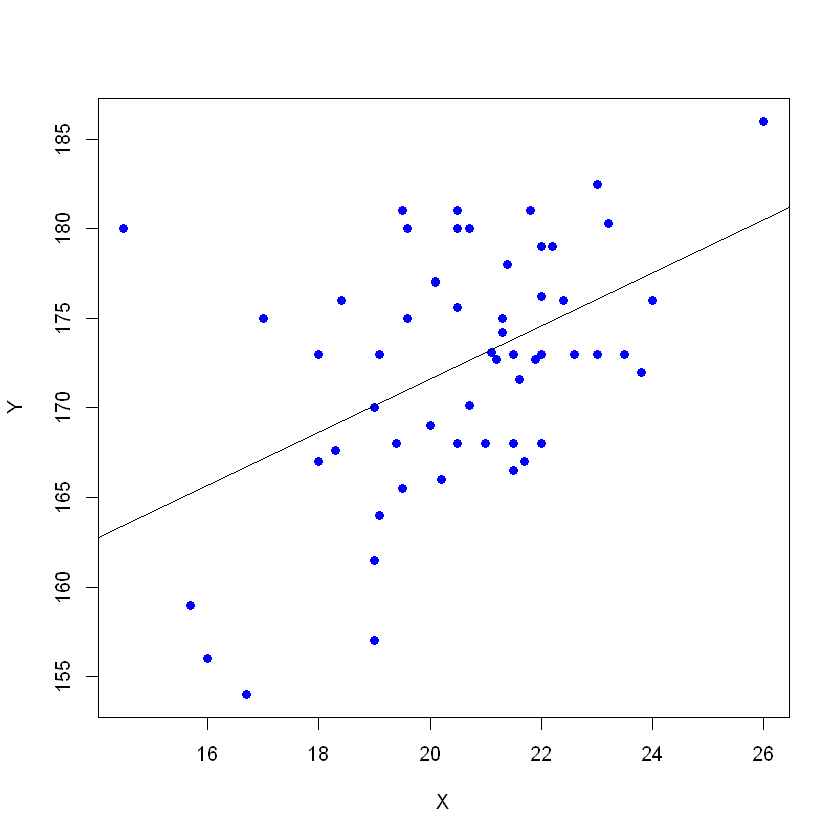

In [3]:
model = lm(Y~X)
plot(X,Y, pch = 16, col = "blue") 
abline(model)
summary(model)

Linear Regression line Y on X : 141.9073 + 1.4852*X

**(2) Predict  your height when your palm length is known.**

In [4]:
predict(model, newdata = mydata  ,interval = "confidence" ) #95% CI

fit,lwr,upr
172.3535,170.714,173.993


In [6]:
predict(model, newdata = mydata, interval = 'prediction') #95% Prediction Interval

fit,lwr,upr
172.3535,159.9766,184.7304


**3) Test for Ho : Bo =0 vs Bo != 0 at level 0.05**

In [7]:
print(paste("Interncept value = " , model$coefficients[1]))
print(paste("Standard Error of intercept = " , summary(model)$coefficients[1,2]))
print(paste("t-value = ",summary(model)$coefficients[1,3]))
print(paste("p-value =",summary(model)$coefficients[1,4] ))

[1] "Interncept value =  141.90731264563"
[1] "Standard Error of intercept =  7.85617522367301"
[1] "t-value =  18.0631552384449"
[1] "p-value = 1.50531361840329e-24"


**Ans:** : From the model, <br> Bo (intercept) = 141.9073. <br>
                           SE of intercept = 7.8561 <br>
                          Under Ho, t statistic = 141.9073/7.8561 = 18.0631 ~ t distribution with df = n-2 = 54 <br>
                          p-value =  1.5e-24.<br>
                          Since p-value < 0.05, we reject the Null Hypothesis Bo = 0. 
 

**4) Test for Ho : B1 =8 vs B1 != 8 at level 0.05**

In [10]:
print(paste("Slope value = " , model$coefficients[2]))
print(paste("Standard Error of slope = " , summary(model)$coefficients[2,2]))
print(paste("t-value = ",(model$coefficients[2]-8)/(summary(model)$coefficients[2,2])))
print(paste("p-value =",pt((model$coefficients[2]-8)/(summary(model)$coefficients[2,2]) , 54) ))

[1] "Slope value =  1.48517917008326"
[1] "Standard Error of slope =  0.380583082357847"
[1] "t-value =  -17.1179990175998"
[1] "p-value = 8.97167196799356e-24"


**Ans:** : From the model, <br> B1 (slope) = 1.4851 <br>
                           SE of slope = 0.3805 <br>
                          Under Ho, t statistic = (1.4851 - 8)/0.3805 = -17.1179 ~ t distribution with df = n-2 = 54 <br>
                          p-value = 8.97e-24<br>
                          Since p-value < 0.05, we reject the Null Hypothesis slope = 8. 
 

**5) Consider (X,Y) follows bivariate normal distribution. Find the regression of Y on X**

**Ans:** When (X,Y) follows bivariate normal distribution, then <br> regression of Y on X =  **E(Y|X = x) = (µy) + (correlation*(Sy/Sx)*(x - µx)** 

In [11]:
print(paste("µy = ", mean(Y)))
print(paste("µx = ", mean(X)))
print(paste("Sy = ", sqrt(var(Y))))
print(paste("Sx = ", sqrt(var(X))))
print(paste("correlation = ", cor(X,Y)))

[1] "µy =  172.398571428571"
[1] "µx =  20.5303571428571"
[1] "Sy =  6.86498663934909"
[1] "Sx =  2.16794159958722"
[1] "correlation =  0.469014999564399"


Thus Regression of Y on X = E(Y|X=x ) = 172.3985 + 0.4690*(6.8649/2.1679)*(x - 20.5303) <br>
or **172.3985 + 1.4851*(x-20.5303)**

**Prediction on my data for x= 22.4 :** 

In [12]:
172.3985 + 1.4851*( mydata$X - 20.5303)

[1] 172.3535

**6) Consider  L1 norm and ﬁt a  simple linear regression model  for Y on X.**

In [13]:
library(L1pack)
l1model = l1fit(X, Y, intercept = TRUE, tolerance = 1e-07, print.it = TRUE)
l1model$coefficients

Intercept          X 
135.583450   1.751724

Regression model for Y on X using L1 norm : 135.5834 + 1.7517*X<br>

**Prediction on my data for x= 22.4 :** 

In [14]:
135.5834 + 1.7517*22.4

[1] 174.8215

**(7) Plot the  there regression lines obtained in 1,5 and 6  in a diagram.**

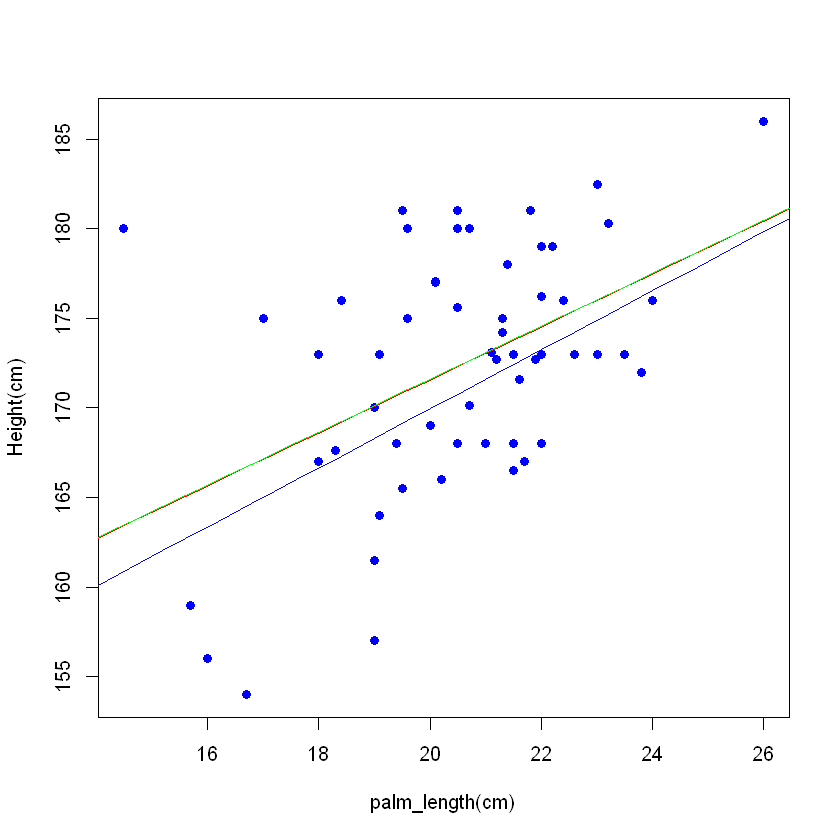

In [15]:
plot(X,Y, pch = 16, col = "blue",xlab = "palm_length(cm)" , ylab = "Height(cm)") 
lines(seq(0,30,0.4) , 141.9744 + 1.4790*(seq(0,30,0.4)),type = "l", col = "red"  )  #Q1
lines(seq(0,30,0.4) , 142.04+ 1.478*(seq(0,30,0.4)),type = "l", col = "green")    #Q5
lines(seq(0,30,0.4) , 136.9875 + 1.6479*(seq(0,30,0.4)),type = "l", col = "blue")   #Q6

Blue Line is line obtained by fitting regression line using L1 norm.<br>
Red Line is least squares line.<br>
Green Line is obtained by bivariate normal distribution.